## Statistical Outlier Removal filter

본 챕터에서는 Noise 제거 방법 중 하나인 Statistical Outlier Removal filter에 대하여 다루고 있습니다. 

자세한 내용은 [Removing outliers using a Statistical OutlierRemoval filter](http://pointclouds.org/documentation/tutorials/statistical_outlier.php#statistical-outlier-removal)를 참고 하시면 됩니다.  

In [36]:
%load_ext watermark
%watermark -d -v -p pcl,numpy

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2018-11-23 

CPython 3.5.2
IPython 6.4.0

pcl unknown
numpy 1.14.5


In [11]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import pcl
import numpy as np
import random

import os
os.chdir("/workspace/3D_People_Detection_Tracking") 

In [17]:
from include.visualization_helper import *
%matplotlib inline

## do_statistical_outlier_filtering 정의

입력 
- pcl_data : point cloud
- mean_k : 분석시 참고할 주변 점의 수
- tresh : Noise로 판단시 사용할 거리 정보

출력  
- point cloud

In [12]:
def do_statistical_outlier_filtering(pcl_data,mean_k,tresh):
    '''
    :param pcl_data: point could data subscriber
    :param mean_k:  number of neighboring points to analyze for any given point
    :param tresh:   Any point with a mean distance larger than global will be considered outlier
    :return: Statistical outlier filtered point cloud data
    eg) cloud = do_statistical_outlier_filtering(cloud,10,0.001)
    : https://github.com/fouliex/RoboticPerception
    '''
    outlier_filter = pcl_data.make_statistical_outlier_filter()
    outlier_filter.set_mean_k(mean_k)
    outlier_filter.set_std_dev_mul_thresh(tresh)
    return outlier_filter.filter()


## 랜덤 Point Cloud 생성

In [29]:
cloud = pcl.PointCloud()

points = np.zeros((5, 3), dtype=np.float32)
RAND_MAX = 1024.0
for i in range(0, 5):
    points[i][0] = 1024 * random.random () / RAND_MAX
    points[i][1] = 1024 * random.random () / RAND_MAX
    points[i][2] = 1024 * random.random () / RAND_MAX

cloud.from_array(points)

Number of Points : 5
x: 0.47851642966270447, y : 0.03497461602091789, z : 0.535773754119873
x: 0.3981524109840393, y : 0.1518072634935379, z : 0.09672793000936508
x: 0.7707034349441528, y : 0.07869423180818558, z : 0.6807618141174316
x: 0.13448742032051086, y : 0.6192044019699097, z : 0.35335949063301086
x: 0.5647233724594116, y : 0.20890095829963684, z : 0.6382982134819031
(x) : 0.6m
(y) : 0.6m
(z) : 0.6m


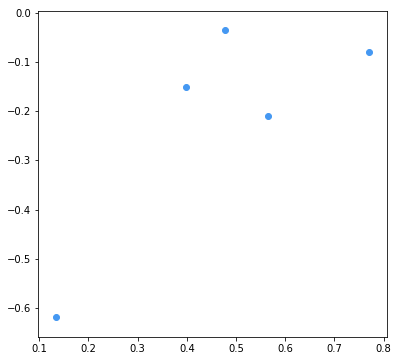

In [27]:
print("Number of Points : {}".format(cloud.size))
for i in range(0, cloud.size):
    print ('x: '  + str(cloud[i][0]) + ', y : ' + str(cloud[i][1])  + ', z : ' + str(cloud[i][2]))

if (cloud.size!=0):
    visualization2D_xyz(cloud.to_array())    

## do_statistical_outlier_filtering 수행

In [14]:
mean_k = 10
tresh = 0.001

In [30]:
cloud = do_statistical_outlier_filtering(cloud,mean_k,tresh)

Number of Points : 2
x: 0.8091028332710266, y : 0.8478883504867554, z : 0.9810506701469421
x: 0.7552645802497864, y : 0.975726842880249, z : 0.8663910627365112
(x) : 0.1m
(y) : 0.1m
(z) : 0.1m


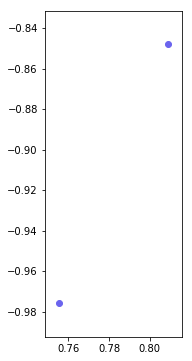

In [31]:
print("Number of Points : {}".format(cloud.size))
for i in range(0, cloud.size):
    print ('x: '  + str(cloud[i][0]) + ', y : ' + str(cloud[i][1])  + ', z : ' + str(cloud[i][2]))

if (cloud.size!=0):
    visualization2D_xyz(cloud.to_array())    